In [142]:
import csv
import numpy as np

In [143]:
with open("train.csv", "rb") as f:
    reader = csv.reader(f)
    data = []
    for row in reader:
        data.append(row)
f.close()
header = data[0]
data = data[1:]

In [144]:
data[0]

['12612628',
 'Engineering Systems Analyst',
 'Engineering Systems Analyst Dorking Surrey Salary ****K Our client is located in Dorking, Surrey and are looking for Engineering Systems Analyst our client provides specialist software development Keywords Mathematical Modelling, Risk Analysis, System Modelling, Optimisation, MISER, PIONEEER Engineering Systems Analyst Dorking Surrey Salary ****K',
 'Dorking, Surrey, Surrey',
 'Dorking',
 '',
 'permanent',
 'Gregory Martin International',
 'Engineering Jobs',
 '20000 - 30000/annum 20-30K',
 '25000',
 'cv-library.co.uk']

In [145]:
newdata = zip(*data)

In [394]:
len(set(newdata[1])),len(set(newdata[4])),len(set(newdata[6])), len(set(newdata[7])), len(set(newdata[8])), len(set(newdata[11]))

(8274, 899, 3, 1198, 28, 74)

In [395]:
newdata[7][:10]

('Gregory Martin International',
 'Gregory Martin International',
 'Gregory Martin International',
 'Gregory Martin International',
 'Gregory Martin International',
 'Gregory Martin International',
 'Indigo 21 Ltd',
 'Code Blue Recruitment',
 'Code Blue Recruitment',
 'Indigo 21 Ltd')

In [147]:
with open("test.csv", "rb") as f:
    reader = csv.reader(f)
    testdata = []
    for row in reader:
        testdata.append(row)
f.close()
testheader = testdata[0]
testdata = testdata[1:]
newtestdata = zip(*testdata)

In [148]:
testdata[0]

['1',
 '72629919',
 'NDT Quality Inspector FPI level 2',
 'NDT Inspector qualified with FPI Level 2 required for a precision engineering company based in the Leicester area. The role will include NDT, shop floor inspection and general quality inspector work. The company manufactures precision components for the aersopace and power generation industries and is part of a global engineering group. Excellent career potential, good rates of pay  overtime and other benefits. The Non Destructive Testing Inspector with Fluoresecent Penetrant Inspection experience will in inspect areospace components in line with strict procedures and specifications. The position will initially be days whilst training, moving to 2/3 shift (mon  fri). Person Specification Must hold a level 2 FPI qualification Must have proven NDT experience&nbsp Experience must have ideally been gained on Aerospace or similar precision engineered products Must have excellent attention to detail Will ideally have experience of wo

In [149]:
#address, contract type, Job type, website
len(set(newdata[4])),len(set(newdata[6])), len(set(newdata[8])), len(set(newdata[11])), set(newdata[6])

(899, 3, 28, 74, {'', 'contract', 'permanent'})

In [90]:
len(set(newtestdata[5])), len(set(newtestdata[7])), len(set(newtestdata[9])), len(set(newtestdata[10]))

(520, 3, 29, 58)

In [396]:
AddressSet, ContractSet=set(newdata[4]), set(newdata[6])
JobSet, WebSet=set(newdata[8]), set(newdata[11])
CompanySet = set(newdata[7])

In [247]:
import string
import re
lowerLetter = [s for s in string.lowercase[:]]
upperLetter = [s for s in string.uppercase[:]]
numbers = [str(i) for i in range(10)]
JobTitle = [re.split('\// |\/ |, |& |[ |] |: | ', jobTitle) for jobTitle in newdata[1]]
ExclusionList = ['', '****', 'in', 'and',\
                 'the', 'to', '****k', 'for',\
                 'or', 'Night', 'West', 'In',\
                 'de', 'Job', 'C', 'needed', \
                 'Days', 'per', 'x****', 'jobs',\
                 'the', 'IN', '\xe2\x80\x93',\
                 'Workers', '****K', 'up', 'required',\
                 'Wanted', 'of', 'at', 'on', 'plus',\
                 'with', 'The', ] + lowerLetter + upperLetter + numbers
                 
JobTitle = [key.lstrip('(').rstrip(')') for job in JobTitle for key in job\
            if key not in ExclusionList and '*' not in key]

In [248]:
SimilarWords = [['Nurse', 'Nursing', 'Nurses', 'Nursey', \
                 'nursing', 'NURSE', 'nurse', 'NURSING', 'NURSES'\
                 'Nursing/care', 'NursingRGN', 'Nurse\'s', 'NUrse'], 
                ['Engineer', 'Engineering', 'Engineers', \
                 'ENGINEER', 'engineer', 'ENGINEERS'],
                ['Developer', 'Development', 'Developers',\
                 'DEVELOPER', 'developer', 'development',\
                 'DEVELOPMENT', 'DEVELOPERS'],
                ['Manager', 'Management', 'MANAGER', 'Managers',\
                 'manager', 'management', 'MANAGERS', 'Managing',\
                 'MANAGEMENT', 'managing'],
                ['Driver', 'Drivers', 'Driving']
                ]    

In [249]:
def combineSimilarWords(SimilarWords, JobTitleCount):
    for i in range(len(SimilarWords)):
        wordInit = SimilarWords[i][0]
        count = JobTitleCount[wordInit]
        for j in range(1, len(SimilarWords[i])):
            word = SimilarWords[i][j]
            count = count + JobTitleCount[word]
            del JobTitleCount[word]
        JobTitleCount[wordInit] = count

In [250]:
def removeInfrequentWord(JobTitleCount):
    newJobTitleCount = {}
    for key in JobTitleCount:
        if JobTitleCount[key] > 10:
            newJobTitleCount[key] = JobTitleCount[key]
    return newJobTitleCount

In [252]:
from collections import Counter
JobTitleCount = Counter(JobTitle)
combineSimilarWords(SimilarWords, JobTitleCount)
JobTitleCount = removeInfrequentWord(JobTitleCount)
len(JobTitleCount)

554

In [117]:
def buildFeatureColumns(featureSet, columnData, isTest):
    featureList = list(featureSet)
    n, m = len(featureList), len(columnData)
    X = np.zeros([m, n])
    for i in range(m):
        if isTest == False:
            if columnData[i] not in featureList:
                print "Error: data not included in feature set: " + columnData[i]
                return 
        if columnData[i] in featureList:
            j = featureList.index(columnData[i])
            X[i][j] = 1
    return X

In [369]:
def cleanString(jobTitle, SimilarWords):
    jobTitle = re.split('\// |\/ |, |& |[ |] |: | ', jobTitle)
    jobTitle = [key.lstrip('(').rstrip(')') for key in jobTitle\
            if key not in ExclusionList and '*' not in key]
    for i in range(len(SimilarWords)):
        setWord = SimilarWords[i][0]
        for j in range(len(jobTitle)):
            if jobTitle[j] in SimilarWords[i]:
                jobTitle[j] = setWord
    return jobTitle

In [373]:
###############To be continued ###################
def buildStringFeatureColumns(featureList, columnData):
    n, m = len(featureList), len(columnData)
    X = np.zeros([m, n])
    for i in range(m):
        features = cleanString(columnData[i], SimilarWords)
        Matches, matchCount = [], 0
        for keyword in features:
            if keyword in featureList:
                j = featureList.index(keyword)
                X[i][j] = 1
                matchCount = matchCount + 1
                Matches.append(j)
        for jj in Matches:
            X[i][jj] = X[i][jj]*1.0/matchCount
    return X

In [397]:
addressX = buildFeatureColumns(AddressSet, newdata[4], False)
contractX = buildFeatureColumns(ContractSet, newdata[6], False)
companyX = buildFeatureColumns(CompanySet, newdata[7], False)
jobX = buildFeatureColumns(JobSet, newdata[8], False)
webX = buildFeatureColumns(WebSet, newdata[11], False)
JobTitleCountX = buildStringFeatureColumns(JobTitleCount.keys(), newdata[1])
X0 = np.ones([len(newdata[0]), 1])
#X = np.concatenate((X0, addressX, contractX, jobX, webX), axis=1)
X = np.concatenate((X0, addressX, contractX, jobX, companyX, webX, JobTitleCountX), axis=1)
y = np.array([int(yi) for yi in newdata[10]])

In [398]:
X.shape

(10000, 2757)

In [399]:
def computeCostFunction(X, y, theta):
    cost = sum([diff**2 for diff in (np.dot(X, theta) - y)])/(2.0*len(y))
    return cost

In [400]:
theta = np.zeros([len(X[0])])
alpha = 0.01

In [401]:
def gradientDescent(X, y, theta, alpha):
    L = len(y)
    Jtheta1 = computeCostFunction(X, y, theta)
    JthetaList = [Jtheta1]
    for i in range(10000):
        #print (X.transpose()).shape, (np.dot(X, theta) - y).shape
        #print np.dot(X.transpose(), np.dot(X, theta) - y)
        theta = theta - alpha*np.dot(X.transpose(), np.dot(X, theta) - y)/L
        Jtheta2 = computeCostFunction(X, y, theta)
        if abs(Jtheta1 - Jtheta2)/Jtheta1 < 1e-4:
            break
        Jtheta1 = Jtheta2
        JthetaList.append(Jtheta1)
    return theta, JthetaList

In [402]:
theta, JthetaList = gradientDescent(X, y, theta, alpha)

In [403]:
print y[:10]

[25000 30000 30000 27500 25000 25000 75000 22000 23000 85000]


In [404]:
%matplotlib inline

In [405]:
import matplotlib.pyplot as plt
import numpy as np

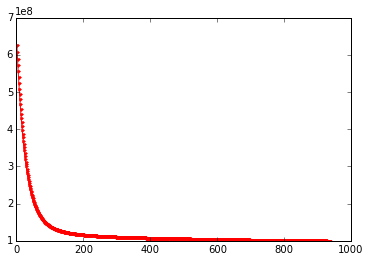

In [406]:
plt.figure()
plt.plot(range(1, len(JthetaList)+1), JthetaList, 'r.-')
plt.show()

In [407]:
print len(JthetaList)

937


In [385]:
with open("test.csv", "rb") as f:
    reader = csv.reader(f)
    data = []
    for row in reader:
        data.append(row)
f.close()
headerTest = data[0]
data = data[1:]
newdataTest = zip(*data)

In [408]:
addressXTest = buildFeatureColumns(AddressSet, newdataTest[5], True)
contractXTest = buildFeatureColumns(ContractSet, newdataTest[7], True)
companyXTest = buildFeatureColumns(CompanySet, newdataTest[8], True)
jobXTest = buildFeatureColumns(JobSet, newdataTest[9], True)
webXTest = buildFeatureColumns(WebSet, newdataTest[10], True)
JobTitleCountX = buildStringFeatureColumns(JobTitleCount.keys(), newdataTest[2])

In [409]:
X0Test = np.ones([len(newdataTest[0]), 1])
#XTest = np.concatenate((X0Test, addressXTest, contractXTest, jobXTest, webXTest\
#                       ), axis=1)
XTest = np.concatenate((X0Test, addressXTest, contractXTest, jobXTest, companyXTest, webXTest,\
                       JobTitleCountX), axis=1)

In [410]:
XTest.shape, theta.shape

((5000, 2757), (2757,))

In [411]:
yTest = np.dot(XTest, theta)

In [412]:
newdataTest[2][:10]

('NDT Quality Inspector FPI level 2',
 'MidLevel NET Developer',
 'C NET **** ASPNET MVC WCF Agile Developer Finance ****K',
 'Dutch speaking Online Content & marketing Executive',
 'IMMIGRATION LAWYERS  MIDDLESEX',
 'Fast Fit Branch Manager, Oxford, Motor Trade',
 'English Technical Support Brno, Czech Republic **** CZK',
 'COMMERCIAL DISPUTES LAWYER  NORTHAMPTONSHIRE',
 'French Technical Support Brno, Czech Republic **** CZK',
 'CRA Germany')

In [413]:
yTest[:10]

array([ 31644.16017485,  37223.71810321,  42835.59846988,  35424.04107036,
        29320.89479601,  29201.51510917,  36148.01026914,  28064.49538321,
        36126.00237704,  30657.53584631])

In [414]:
IdList = [int(id) for id in newdataTest[1]]
prediction = zip(*[IdList, yTest])

In [415]:
wfile = open('prediction.txt', 'w')
wfile.write('%s\n' % 'Id,PredictedSalary')
for i in range(len(prediction)):
    wfile.write('%d,%d\n' % (prediction[i][0], prediction[i][1]))
wfile.close()